# DAVE3625 Assignment 2: Machine Learning
## Case 2: Predict passenger data for Ruter

In [590]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import PoissonRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error

In [591]:
# Load and preprocess the dataset
ruter_data = pd.read_csv("https://raw.githubusercontent.com/atikagondal/Assignment-2-dave3625-202323/main/Ruter-data.csv", delimiter=';')
ruter_data['Dato'] = pd.to_datetime(ruter_data['Dato'], format='%d/%m/%Y')
ruter_data['DayOfWeek'] = ruter_data['Dato'].dt.dayofweek
ruter_data['Month'] = ruter_data['Dato'].dt.month
ruter_data['Year'] = ruter_data['Dato'].dt.year
ruter_data['Day'] = ruter_data['Dato'].dt.day

bus_route = bus_route = ruter_data['Linjenavn'].value_counts().head(1).index[0] # this gets the the most common bus route in the dataset
ruter_data_specific = ruter_data[ruter_data['Linjenavn'] == bus_route]

In [592]:
# Selecting the features we think are relevant and will provide the best results, and the target
X = ruter_data_specific[['DayOfWeek', 'Month', 'Year', 'Day']]
y = ruter_data_specific['Passasjerer_Ombord']

In [593]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y = y.clip(lower=0)

In [594]:
# Train the model on the dataset
model_poisson = PoissonRegressor()
model_poisson.fit(X, y)
y_pred = model_poisson.predict(X)

In [595]:
# Calculate R² and MSE
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)

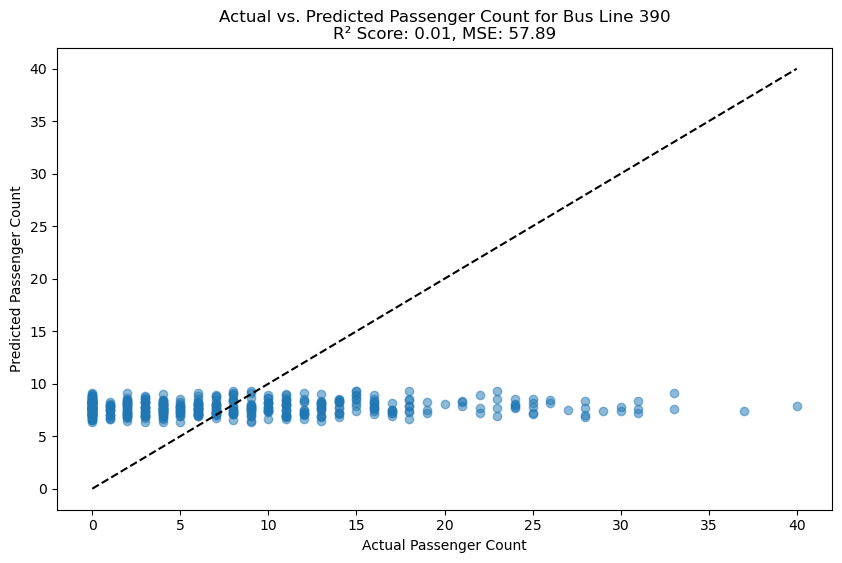

In [596]:
# Plotting actual vs. predicted passenger counts
plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred, alpha=0.5)
plt.xlabel('Actual Passenger Count')
plt.ylabel('Predicted Passenger Count')
plt.title(f'Actual vs. Predicted Passenger Count for Bus Line 390\nR² Score: {r2:.2f}, MSE: {mse:.2f}')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--')
plt.show()

In [597]:
# Prediction function
def predict_passengers(date_str, model):
    date = pd.to_datetime(date_str, format='%Y-%m-%d')
    features = pd.DataFrame({
        'DayOfWeek': [date.dayofweek],
        'Month': [date.month],
        'Year': [date.year],
        'Day': [date.day],
    })
    prediction = model.predict(features)
    return prediction[0]

In [598]:
y_train_pred = model_poisson.predict(X)

In [599]:
for i in range(10): 
    date = pd.date_range(start='2020-01-01', end='2023-12-31').to_series().sample(1).dt.strftime('%Y-%m-%d').values[0]
    predicted_passengers = predict_passengers(date, model_poisson)
    print(f"Predicted number of passengers on {date}: {predicted_passengers:.2f}")

input_date = input("Enter a date (YYYY-MM-DD): ")
if input_date != '':
    predicted_passengers = predict_passengers(input_date, model_poisson)
    print(f"\n\nPredicted number of passengers on {input_date}: {predicted_passengers:.2f}")

print(f"\nR-squared (R²) score: {r2}")
print(f"Mean Squared Error (MSE): {mse}")

Predicted number of passengers on 2022-03-02: 6.39
Predicted number of passengers on 2021-06-17: 7.34
Predicted number of passengers on 2023-09-30: 8.06
Predicted number of passengers on 2020-02-27: 6.15
Predicted number of passengers on 2020-06-06: 6.62
Predicted number of passengers on 2020-07-18: 7.13
Predicted number of passengers on 2021-09-17: 8.17
Predicted number of passengers on 2023-03-22: 6.66
Predicted number of passengers on 2022-02-06: 5.22
Predicted number of passengers on 2020-09-14: 9.55

R-squared (R²) score: 0.008179634153882454
Mean Squared Error (MSE): 57.89361320072957
